In [110]:
# Importing libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA

from scipy.cluster.hierarchy import linkage, dendrogram

from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Setting seed for reproducability
SEED = 42

In [112]:
DATA_PATH = ''

# Load file
data = pd.read_csv(os.path.join(DATA_PATH, 'diabetes_012_health_indicators_BRFSS2015.csv'))

# Previewing data dataset
data.head(7)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00000,1.00000,1.00000,1.00000,40.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,5.00000,18.00000,15.00000,1.00000,0.00000,9.00000,4.00000,3.00000
1,0.00000,0.00000,0.00000,0.00000,25.00000,1.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,3.00000,0.00000,0.00000,0.00000,0.00000,7.00000,6.00000,1.00000
2,0.00000,1.00000,1.00000,1.00000,28.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,1.00000,1.00000,5.00000,30.00000,30.00000,1.00000,0.00000,9.00000,4.00000,8.00000
3,0.00000,1.00000,0.00000,1.00000,27.00000,0.00000,0.00000,0.00000,1.00000,1.00000,...,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,11.00000,3.00000,6.00000
4,0.00000,1.00000,1.00000,1.00000,24.00000,0.00000,0.00000,0.00000,1.00000,1.00000,...,1.00000,0.00000,2.00000,3.00000,0.00000,0.00000,0.00000,11.00000,5.00000,4.00000
5,0.00000,1.00000,1.00000,1.00000,25.00000,1.00000,0.00000,0.00000,1.00000,1.00000,...,1.00000,0.00000,2.00000,0.00000,2.00000,0.00000,1.00000,10.00000,6.00000,8.00000
6,0.00000,1.00000,0.00000,1.00000,30.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,3.00000,0.00000,14.00000,0.00000,0.00000,9.00000,6.00000,7.00000


In [113]:
# Checking size and shape of dataset
data.shape

(253680, 22)

In [114]:
# Data statistical summary
data.describe(include = 'all')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,...,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000,253680.00000
mean,0.29692,0.42900,0.42412,0.96267,28.38236,0.44317,0.04057,0.09419,0.75654,0.63426,...,0.95105,0.08418,2.51139,3.18477,4.24208,0.16822,0.44034,8.03212,5.05043,6.05387
std,0.69816,0.49493,0.49421,0.18957,6.60869,0.49676,0.19729,0.29209,0.42917,0.48164,...,0.21576,0.27765,1.06848,7.41285,8.71795,0.37407,0.49643,3.05422,0.98577,2.07115
min,0.00000,0.00000,0.00000,0.00000,12.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000
25%,0.00000,0.00000,0.00000,1.00000,24.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,6.00000,4.00000,5.00000
50%,0.00000,0.00000,0.00000,1.00000,27.00000,0.00000,0.00000,0.00000,1.00000,1.00000,...,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,8.00000,5.00000,7.00000
75%,0.00000,1.00000,1.00000,1.00000,31.00000,1.00000,0.00000,0.00000,1.00000,1.00000,...,1.00000,0.00000,3.00000,2.00000,3.00000,0.00000,1.00000,10.00000,6.00000,8.00000
max,2.00000,1.00000,1.00000,1.00000,98.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,5.00000,30.00000,30.00000,1.00000,1.00000,13.00000,6.00000,8.00000


In [115]:
# Checking for missing values
data.isnull().sum().any()

False

In [116]:
# Printing dataset columns
print(data.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


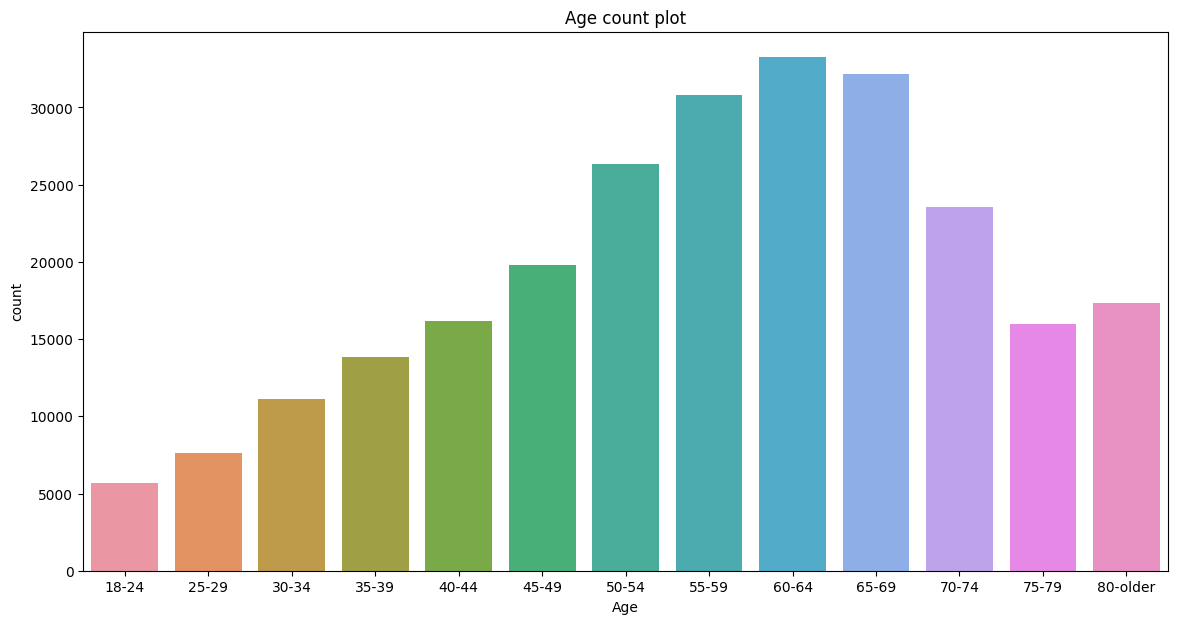

In [117]:
# Age countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Age', data = data)
plt.title('Age count plot')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-older'])
plt.show()

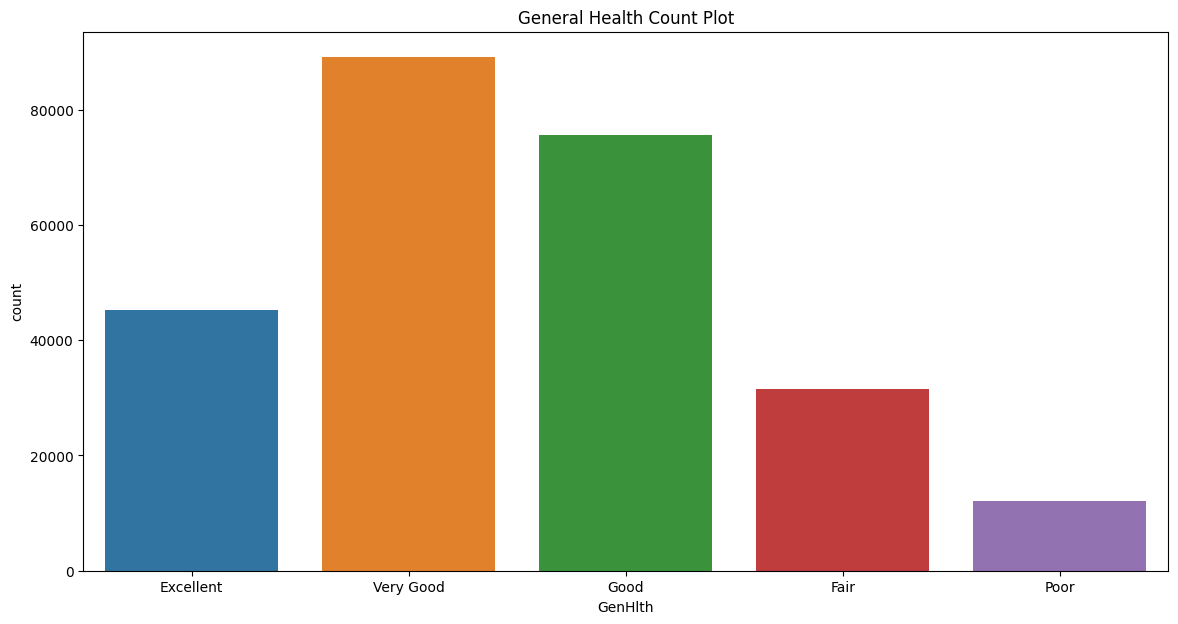

In [118]:
# General Health countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'GenHlth', data = data)
plt.title('General Health Count Plot')
plt.xticks([0, 1, 2, 3, 4], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.show()

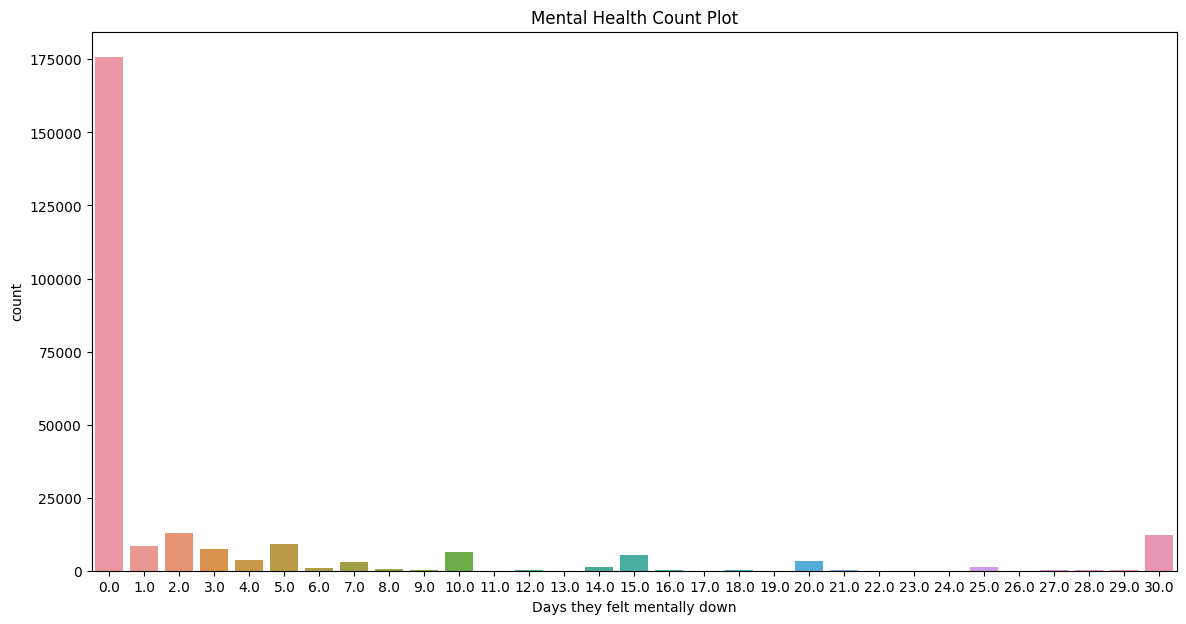

In [119]:
# Mental Health countplot for mental health, which includes stress, depression, and problems with emotions,for how many days during the past 30
plt.figure(figsize = (14, 7))
sns.countplot(x = 'MentHlth', data = data)
plt.title('Mental Health Count Plot')
plt.xlabel('Days they felt mentally down')
plt.show()

In [120]:
# Top 10 correlated features to the target
top10_corrs = abs(data.corr()['Diabetes_012']).sort_values(ascending = False).head(11)
top10_corrs

Diabetes_012           1.00000
GenHlth                0.30259
HighBP                 0.27160
BMI                    0.22438
DiffWalk               0.22424
HighChol               0.20908
Age                    0.18503
HeartDiseaseorAttack   0.18027
PhysHlth               0.17629
Income                 0.17148
Education              0.13052
Name: Diabetes_012, dtype: float64

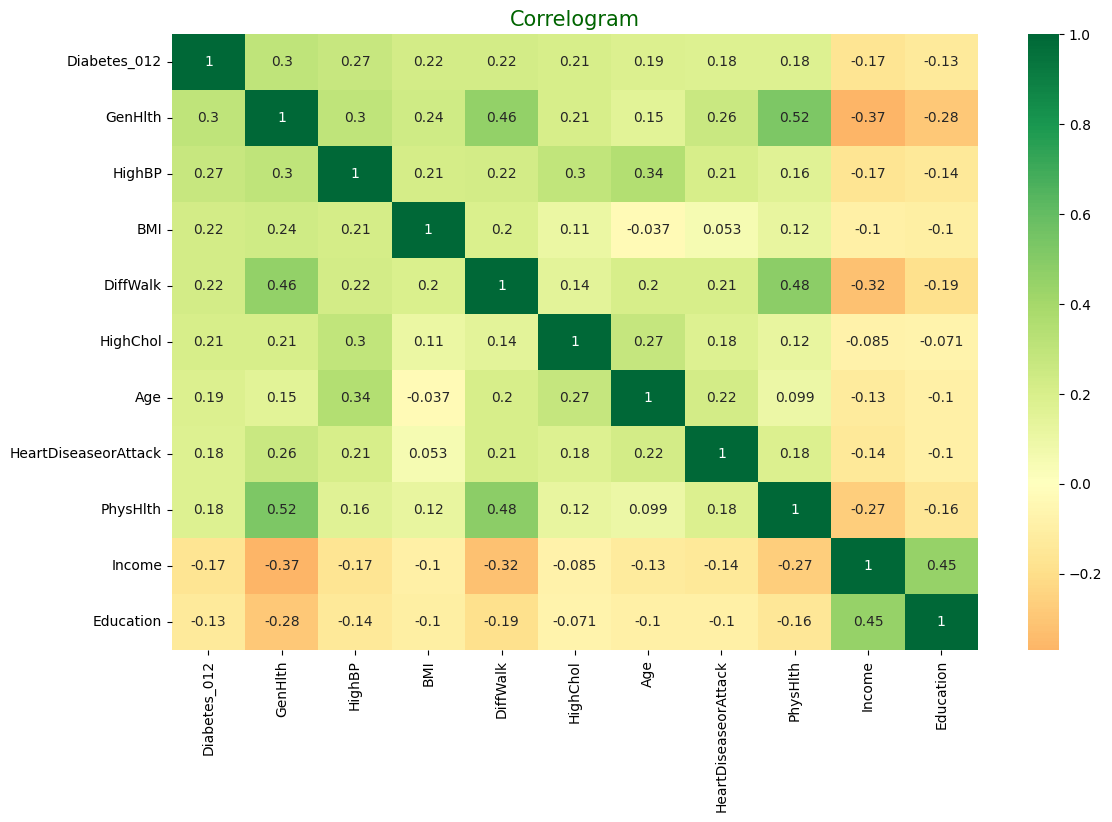

In [121]:
# Quantifying correlations between features
corr = data[list(top10_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [122]:
# Splitting the data set; X contains every feature except the target feature, y contains the target feature
X = data.drop(['Diabetes_012'], axis = 1)
y = data['Diabetes_012']

In [123]:
# Building a cluster model with 2 clusters and fitting it to X, then predicting X with the model and assigning it to labels
cluster_model = KMeans(n_clusters = 2)
cluster_model.fit(X)
labels = cluster_model.predict(X)

In [124]:
# Printing the labels
print((labels))

[0 1 0 ... 1 1 1]


In [125]:
# Creating a for loop fill the diab_status list with text representing each label
diab_status = []
for i in range(len(labels)):
    if labels[i] == 0:
        diab_status.append('Diabetic')
        
    elif labels[i] == 1:
        diab_status.append('Non-Diabetic')

In [126]:
# Creating a dataframe assigning the labels to their status
df = pd.DataFrame({'labels': labels, 'Diabetic Condition': diab_status})
print(df.head(5))

   labels Diabetic Condition
0       0           Diabetic
1       1       Non-Diabetic
2       0           Diabetic
3       1       Non-Diabetic
4       1       Non-Diabetic


In [127]:
# Cross-tabulating
ct = pd.crosstab(df['labels'], df['Diabetic Condition'])
print(ct)

Diabetic Condition  Diabetic  Non-Diabetic
labels                                    
0                      31829             0
1                          0        221851


In [128]:
# Transforming the data to get Principal Component Analyzed features with 2 components
pca_model = PCA(n_components = 2)
pca_model.fit(X)
transformed = pca_model.transform(X)
print(transformed.shape)

(253680, 2)


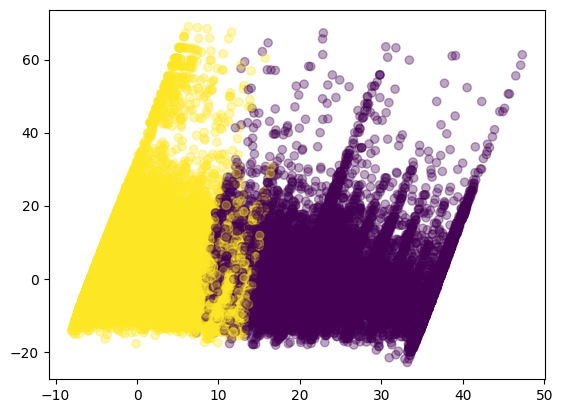

In [129]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c = [labels], alpha = 0.35)
plt.show()

In [130]:
# Selecting the independent variables and the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size = 0.2, random_state = SEED)

In [131]:
#Instantiating the XGBClassifier
xgbc = XGBClassifier(learning_rate  = 0.01,
                     n_estimators = 500,
                     max_depth = 7,
                     min_child_weight = 3,
                     gamma = 0.1,
                     subsample = 1.0,
                     colsample_bytree = 0.6,
                     objective = 'binary:logistic',
                     nthread = 4,
                     seed = SEED)


# fitting the classifier to the data
xgbc.fit(X_train, y_train)

# evaluating the model on the test set
y_pred = xgbc.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred, average = 'weighted')
print("Precision:", precision)

RMSE: 0.7557203275665672
Accuracy: 0.8432671081677704
Precision: 0.7780148826279843


In [132]:
# Instantiating the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=SEED,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=1
)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
rf_y_pred = rf_classifier.predict(X_test)

# Evaluating the model using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print("RMSE (RandomForestClassifier):", rmse)

# Calculatiing accuracy
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, rf_y_pred, average = 'weighted')
print("Precision:", precision)

RMSE (RandomForestClassifier): 0.755146329651662
Accuracy: 0.8434839167455062
Precision: 0.71146511780834


In [133]:
# Instantiating the LGBMClassifier with all its arguments
lgbm_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=50,
    learning_rate=0.01,
    n_estimators=600,
    max_depth=10,
    subsample_for_bin=20000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=0.8,
    subsample_freq=0,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=0.1,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
)

# Fitting the model on the training data
lgbm_classifier.fit(X_train, y_train)

# Making predictions on the testing data
lgbmc_y_pred = lgbm_classifier.predict(X_test)

# Evaluating the model using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, lgbmc_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculating accuracy
accuracy = accuracy_score(y_test, lgbmc_y_pred)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, lgbmc_y_pred, average = 'weighted')
print("Precision:", precision)

Root Mean Squared Error (RMSE): 0.7563981271618064
Accuracy: 0.8430108798486282
Precision: 0.7763634120604193


In [134]:
# Saving the model in binary format
lgbmr_model.booster_.save_model("lgbm_model.txt")

In [ ]:
# Load the saved model
lgbmr_model = LGBMRegressor()
lgbmr_model.booster_.load_model("lgbm_model.txt")